# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import plotly.express as px
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

# Import data

In [2]:
delivered_df = pd.read_csv('../data/processed_data/olist_delivered_customers.csv') 

# Overview data

In [3]:
# Overview data
print('Shape:', delivered_df.shape)
delivered_df.head()

Shape: (96478, 17)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_country,geolocation_lat,geolocation_lng,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,total_number_of_items,total_order_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Brazil,-20.502070,-47.396822,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Brazil,-23.727299,-46.542631,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Brazil,-23.531294,-46.656404,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Brazil,-23.497390,-46.182342,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Brazil,-22.973309,-47.141530,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1,252.25


In [4]:
# Check null values
delivered_df.isnull().sum()

customer_id                       0
customer_unique_id                0
customer_zip_code_prefix          0
customer_city                     0
customer_state                    0
customer_country                  0
geolocation_lat                   0
geolocation_lng                   0
order_id                          0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     0
order_estimated_delivery_date     0
total_number_of_items             0
total_order_value                 0
dtype: int64

In [5]:
# Check data types 
delivered_df.dtypes

customer_id                       object
customer_unique_id                object
customer_zip_code_prefix           int64
customer_city                     object
customer_state                    object
customer_country                  object
geolocation_lat                  float64
geolocation_lng                  float64
order_id                          object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
total_number_of_items              int64
total_order_value                float64
dtype: object

In [6]:
# Convert some columns below to datetime
delivered_df['order_purchase_timestamp'] = pd.to_datetime(delivered_df.order_purchase_timestamp, errors='coerce')
delivered_df['order_approved_at'] = pd.to_datetime(delivered_df.order_approved_at, errors='coerce')
delivered_df['order_delivered_carrier_date'] = pd.to_datetime(delivered_df.order_delivered_carrier_date, errors='coerce')
delivered_df['order_delivered_customer_date'] = pd.to_datetime(delivered_df.order_delivered_customer_date, errors='coerce')
delivered_df['order_estimated_delivery_date'] = pd.to_datetime(delivered_df.order_estimated_delivery_date, errors='coerce')

In [7]:
# Check data types again
delivered_df.dtypes

customer_id                              object
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
customer_country                         object
geolocation_lat                         float64
geolocation_lng                         float64
order_id                                 object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
total_number_of_items                     int64
total_order_value                       float64
dtype: object

# Sales Analysis

In [8]:
print('Start date:', delivered_df.order_purchase_timestamp.min().strftime('%Y-%m-%d'))
print('End date:', delivered_df.order_purchase_timestamp.max().strftime('%Y-%m-%d'))

Start date: 2016-09-15
End date: 2018-08-29


## Total sales of Olist

In [9]:
total_sales = delivered_df.total_order_value.sum()
print('R$ {:,.2f}'.format(total_sales))

R$ 17,580,437.55


## Sales over months

In [10]:
# Calculate sales by month
delivered_df['month'] = delivered_df.order_purchase_timestamp.dt.to_period('M')
sales_month_df = delivered_df.groupby('month').agg({'total_order_value':'sum'}).rename(columns={'total_order_value':'sales'})
sales_month_df.T

month,2016-09,2016-10,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08
sales,286.92,53892.73,19.62,151780.36,298124.69,460292.94,423449.36,632846.13,538167.08,639885.33,742775.22,848690.0,874350.33,1350884.12,930175.36,1225130.09,1122688.19,1278396.99,1298434.09,1295808.12,1148820.58,1166756.6,1098782.7


In [11]:
# Change type of index
sales_month_df.index = sales_month_df.index.astype('str')

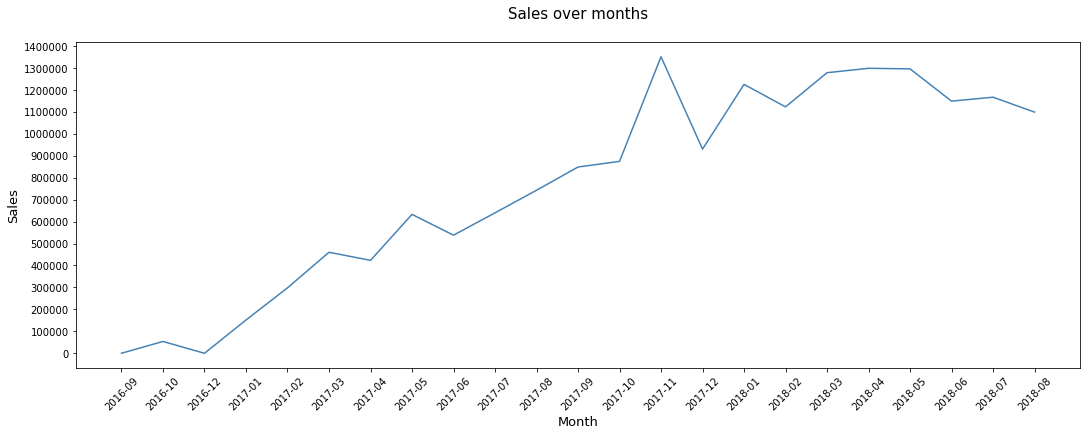

In [12]:
# Visualize sales over month
fig, ax = plt.subplots(figsize=(18, 6))
sns.lineplot(x=sales_month_df.index, y=sales_month_df.sales, color='steelblue', ax=ax)
ax.set_title('Sales over months\n', fontsize=15)
ax.set_xlabel('Month', fontsize=13)
ax.set_ylabel('Sales', fontsize=13)
ax.set_yticks(np.arange(0, 1500000, 100000))
ax.xaxis.set_tick_params(rotation=45)
ax.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.show()

**Comment:** Although there were fluctuations, in general, until 2017 - 11 - the month with the most sales, Olist's sales tended to increase. After this point, Olist's order volume gradually decreases in the following month, and the months after that there are slight fluctuations.

## Sales by State

In [13]:
# Calculate sales by state
state_df = delivered_df.groupby(['customer_country', 'customer_state']).agg({'total_order_value':'sum'})\
                       .sort_values(by='total_order_value', ascending=False).reset_index() \
                       .rename(columns={'customer_country':'Country', 'customer_state':'State', 'total_order_value':'Sales'}) 
print('Shape:', state_df.shape)
state_df.head(10)

Shape: (27, 3)


,Country,State,Sales
0,Brazil,SP,6583169.45
1,Brazil,RJ,2371478.78
2,Brazil,MG,2049407.19
3,Brazil,RS,985365.89
4,Brazil,PR,905824.38
5,Brazil,BA,681373.27
6,Brazil,SC,678448.02
7,Brazil,GO,413280.73
8,Brazil,DF,383849.65
9,Brazil,ES,358030.24


In [14]:
# Create function to load json file
def read_json(arq_json):
    with open(arq_json, 'r', encoding='utf8') as f:
        return json.load(f)

In [15]:
# Load json file
brazil_geo = read_json('../data/map/brazil_geo.json')

In [16]:
# # Visualize sales distribution map

# fig = px.choropleth(state_df,                                                           # Uncomment and run the code to see the interactive map
#                     geojson=brazil_geo,
#                     locations='State',
#                     color='Sales',
#                     color_continuous_scale='Blues',
#                     title='Olist\'s sales distribution map',
#                     labels={'Sales':'Sales'})

# fig.update_geos(fitbounds="locations", visible=False)

# fig.update_layout(autosize=False,
#                   width=1200,
#                   height=600,
#                   title_font_size=25)

# fig.show()

In [17]:
# # Save map as png
# fig.write_image('image/sales_by_state_map.png')

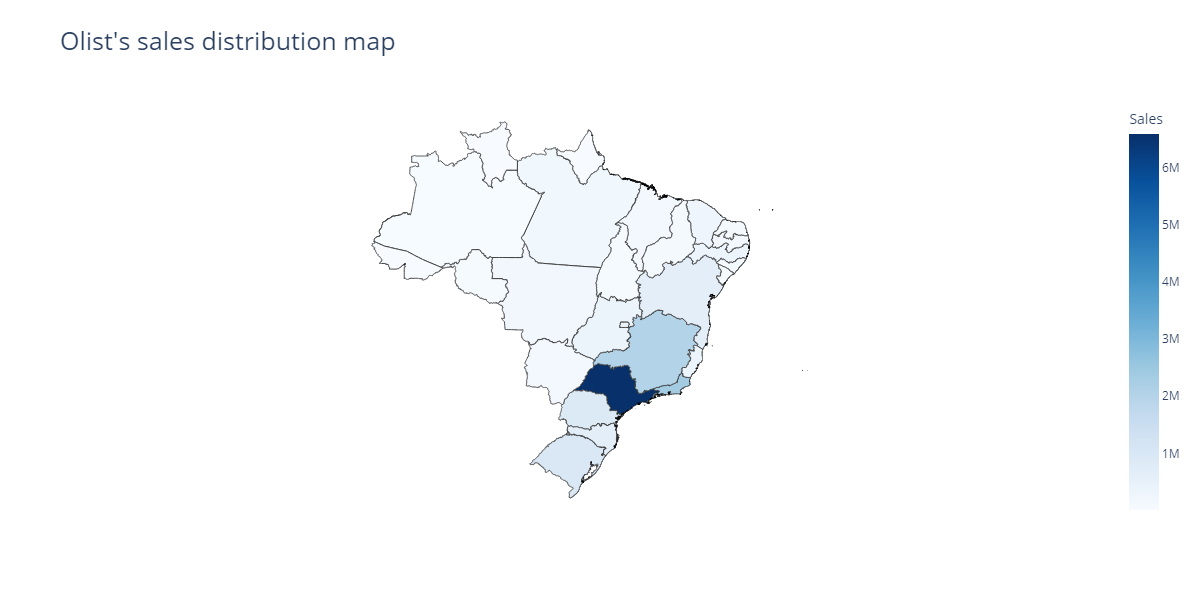

In [18]:
# Display map
Image(filename = '../image/sales_by_state_map.png', width=1200)

**Comment:** Same as Olist's distribution of customers by state (see file [customer_analysis_1.ipynb](customer_analysis_1.ipynb)
). The states that bring the most sales to Olist are concentrated mainly in Southeastern of Brazil. In which, state SP brought the biggest sales with R$ 6,583,169.45. In addition, the 10 states with the most sales are shown in the chart below.

In [19]:
print(state_df.head(10).State.tolist())

['SP', 'RJ', 'MG', 'RS', 'PR', 'BA', 'SC', 'GO', 'DF', 'ES']


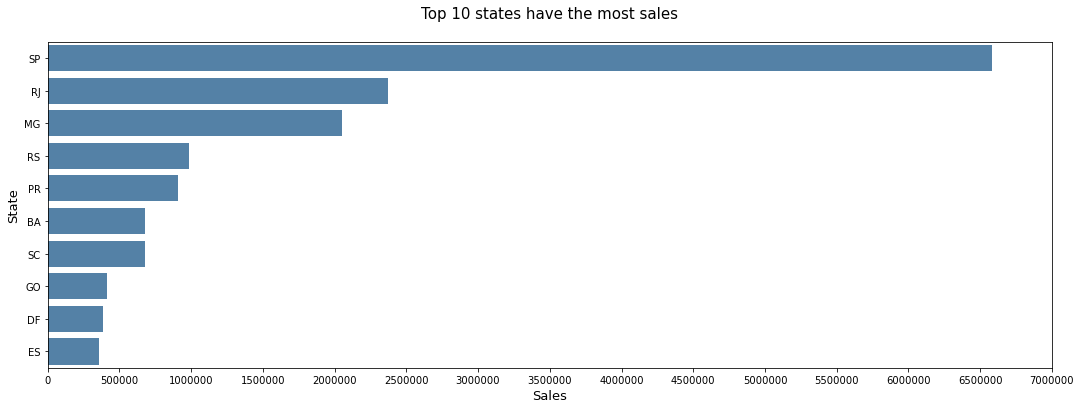

In [20]:
# Visualize the top 10 states have the most sales
fig, ax = plt.subplots(figsize=(18, 6))
sns.barplot(y='State', x='Sales', data=state_df.head(10), color='steelblue', ax=ax)
ax.set_title('Top 10 states have the most sales\n', fontsize=15)
ax.set_xlabel('Sales', fontsize=13)
ax.set_ylabel('State', fontsize=13)
ax.set_xticks(np.arange(0, 7500000, 500000))
# for i, v in enumerate(state_df.head(10)['Sales']):
#     ax.text(v, i+0.10, '  R$ {:,.2f}'.format(v), color='black', ha='left', fontsize=9)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

## Sales by City

In [21]:
# Calculate sales by city
city_df = delivered_df.groupby(['customer_country', 'customer_state', 'customer_city']).agg({'total_order_value':'sum'})\
                      .sort_values(by='total_order_value', ascending=False).reset_index() \
                      .rename(columns={'customer_country':'Country', 'customer_state':'State', 'customer_city':'City', 'total_order_value':'Sales'}) 
print('Shape:', city_df.shape)
city_df.head(10)

Shape: (4272, 4)


,Country,State,City,Sales
0,Brazil,SP,sao paulo,2433678.83
1,Brazil,RJ,rio de janeiro,1315770.27
2,Brazil,MG,belo horizonte,447767.60
3,Brazil,DF,brasilia,382325.35
4,Brazil,PR,curitiba,280105.57
5,Brazil,RS,porto alegre,255028.37
6,Brazil,BA,salvador,243481.28
7,Brazil,SP,campinas,235098.02
8,Brazil,SP,guarulhos,178913.18
9,Brazil,GO,goiania,153719.48


In [22]:
print(city_df.head(10).City.tolist())

['sao paulo', 'rio de janeiro', 'belo horizonte', 'brasilia', 'curitiba', 'porto alegre', 'salvador', 'campinas', 'guarulhos', 'goiania']


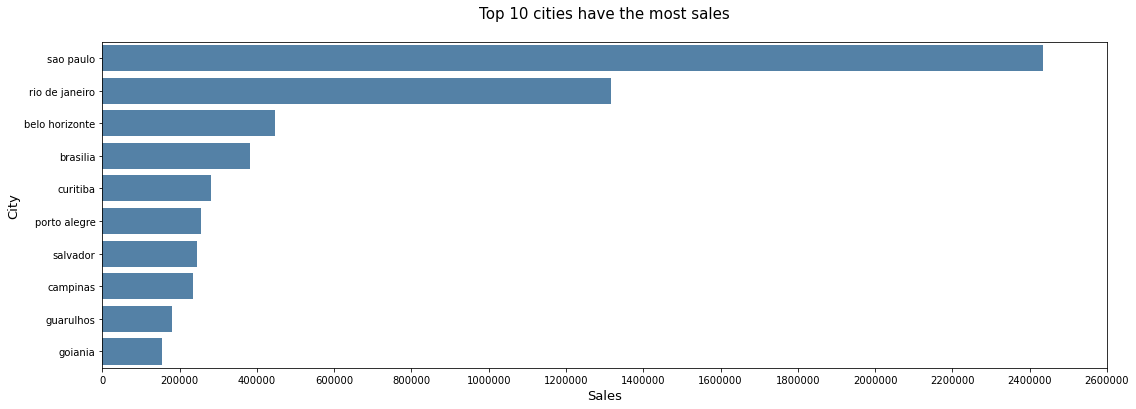

In [23]:
# Visualize the top 10 cities have the most sales
fig, ax = plt.subplots(figsize=(18, 6))
sns.barplot(y='City', x='Sales', data=city_df.head(10), color='steelblue', ax=ax)
ax.set_title('Top 10 cities have the most sales\n', fontsize=15)
ax.set_xlabel('Sales', fontsize=13)
ax.set_ylabel('City', fontsize=13)
ax.set_xticks(np.arange(0, 2800000, 200000))
# for i, v in enumerate(city_df.head(10)['Sales']):
#     ax.text(v, i+0.10, '  R$ {:,.2f}'.format(v), color='black', ha='left', fontsize=9)
plt.ticklabel_format(style='plain', axis='x')
plt.show()

**Comment:** It can be seen that sao paulo is the city have the most sales. In the top 10 cities with the most sales, there are 3 cities in SP state: sao paulo, campinas, guarulhos.